In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv(r'D:\University\Sprints\Titanic\Titanic-Dataset.csv')
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data.drop('Cabin', axis=1, inplace=True)

In [5]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [8]:
# Convert categorical variables to category dtype   
titanic_data['Sex'] = titanic_data['Sex'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])        # male=1, female=0
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

In [10]:
# split data train and test 
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(titanic_data.dtypes)


Survived       int64
Pclass      category
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked       int64
dtype: object


<Axes: xlabel='Survived', ylabel='count'>

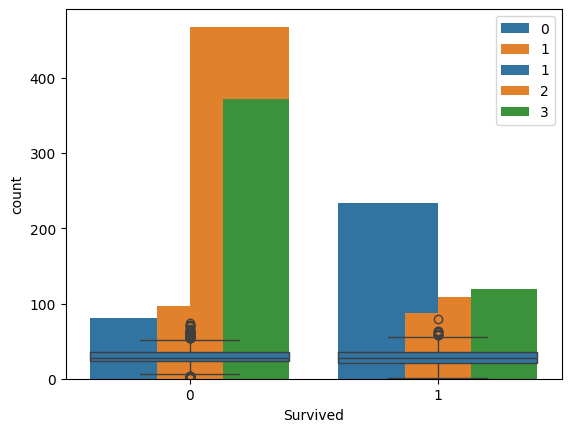

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# نسبة النجاة حسب الجنس
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

# نسبة النجاة حسب الدرجة
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

# العلاقة بين العمر والنجاة
sns.boxplot(x='Survived', y='Age', data=titanic_data)


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest model: {accuracy:.2f}')

Accuracy of Random Forest model: 0.82


In [15]:
# تأكد إن Pclass مش من النوع category
X_train["Pclass"] = X_train["Pclass"].astype(int)
X_test["Pclass"] = X_test["Pclass"].astype(int)


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [18]:
# makenormalization for data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
# Predict using the linear regression model
y_pred_linear = linear_model.predict(X_test_scaled)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy of Logistic Regression model: {accuracy:.2f}')


Accuracy of Logistic Regression model: 0.80


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')


KNN Accuracy: 0.80
SVM Accuracy: 0.82


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Tuned Random Forest Accuracy: 0.82


In [22]:
# make decision tree model
from sklearn.tree import DecisionTreeClassifier 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix:
[[83 22]
 [17 57]]


In [23]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")



XGBoost Accuracy: 0.80


c:\Users\ayaha\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:06:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


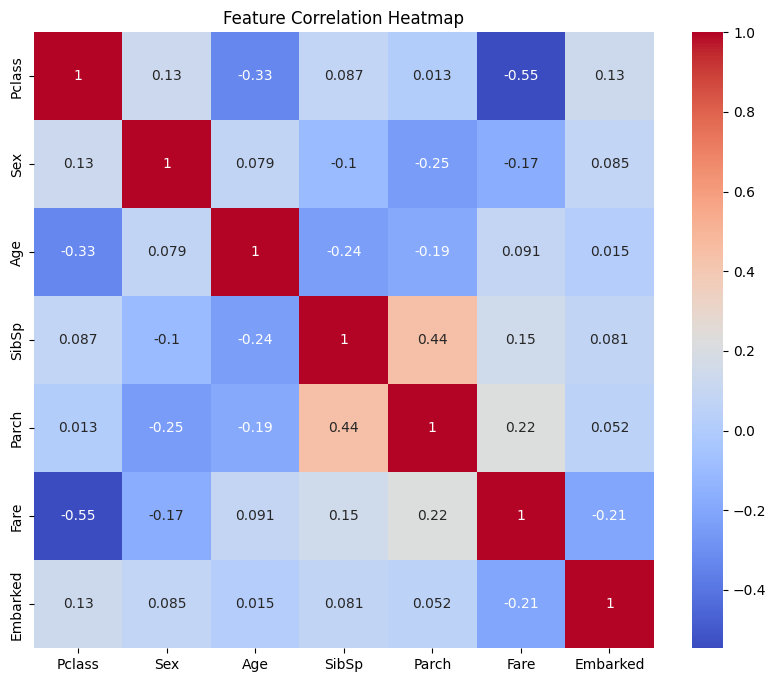

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
print(X_train.columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [28]:
# optimize the model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Accuracy: 0.82


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


[[95 10]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



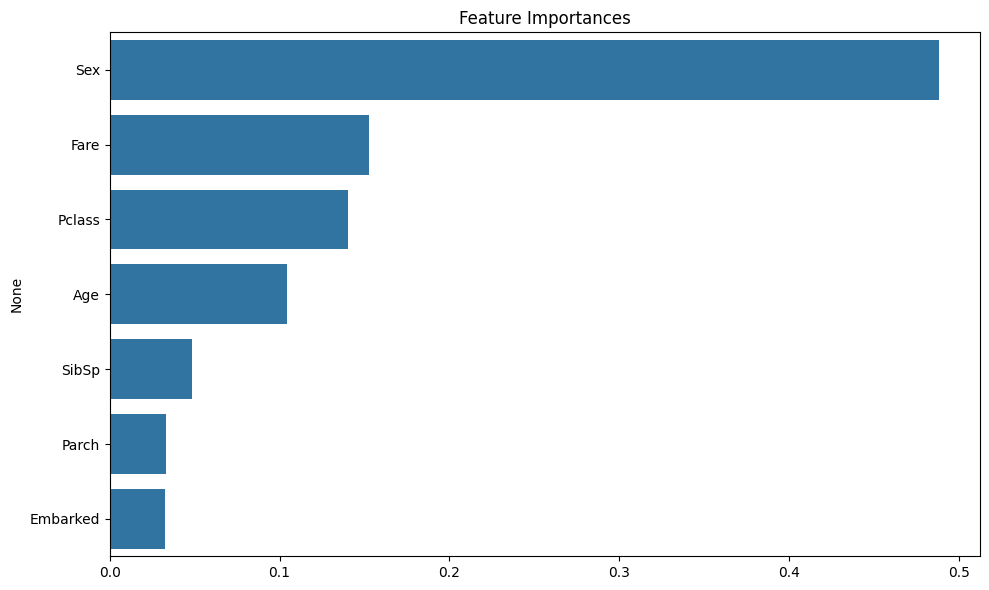

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_rf.feature_importances_
features = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=features[sorted_indices])
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [31]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Gradient Boosting Accuracy: 0.81


In [34]:
# Balance the dataset using SMOTE and try Random forest
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_model_balanced.predict(X_test)
from sklearn.metrics import accuracy_score
rf_balanced_accuracy = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Balanced Random Forest Accuracy: {rf_balanced_accuracy:.2f}")

# normalize data then train a random forest model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
rf_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)
y_pred_rf_scaled = rf_model_scaled.predict(X_test_scaled)
rf_scaled_accuracy = accuracy_score(y_test, y_pred_rf_scaled)
print(f"Scaled Random Forest Accuracy: {rf_scaled_accuracy:.2f}")


Balanced Random Forest Accuracy: 0.82
Scaled Random Forest Accuracy: 0.82


In [ ]:
from sklearn.cluster import KMeans

# Fit KMeans on selected features
kmeans = KMeans(n_clusters=3, random_state=42)
X_cluster = kmeans.fit_predict(X_train)

# Add cluster feature to train and test
X_train['Cluster'] = X_cluster
X_test['Cluster'] = kmeans.predict(X_test)


In [40]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to, say, 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [41]:
# Evaluation K means model accuracy
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train, X_cluster)
print(f'Silhouette Score for KMeans clustering: {silhouette_avg:.2f}')

Silhouette Score for KMeans clustering: 0.78
